# Mission : It's Your Turn!


## 2. Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

1. 데이터를 뽑아봅시다.
2. 데이터에 대한 가설을 세워봅시다.
3. 가설을 검증하기 위한 증거를 찾아봅시다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 내가 선택한 데이터셋

- 관광지의 호텔 중 하나인 호텔 H1과 도심의 호텔 중 하나인 호텔 H2의  2015년 7월 ~ 2017년 8월의 예약 정보 약 119000건을 총 31개의 변수 구조로 데이터화 한 것.


https://www.kaggle.com/jessemostipak/hotel-booking-demand

## Feature Description


Hotel   
(H1 = Resort Hotel or H2 = City Hotel)

is_canceled  
Value indicating if the booking was canceled (1) or not (0)

lead_time  
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year  
Year of arrival date

arrival_date_month  
Month of arrival date

arrival_date_week_number  
Week number of year for arrival date

arrival_date_day_of_month  
Day of arrival date  

stays_in_weekend_nights  
Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights  
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults  
Number of adults

In [2]:
df = pd.read_csv('hotel_bookings.csv')

In [3]:
df.head().append(df.tail())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

'is_canceld' 변수와 'reservation_status'변수가 눈에 띄어 어떤 값들이 있는지 살펴보았습니다.

In [5]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [6]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

'reservation_status'변수의 'Canceled'와 'No-Show'가 합쳐져서 'is_canceld'의 value 1이 된 것을 짐작해볼 수 있습니다.  

## 중점적으로 살펴볼 feature 결정

저는 이 'is_canceld'변수를 종속 변수로 두고, 이것과 관련이 있는 feature들이 무엇인지 EDA로 살펴보려고 합니다.  
숙박사업에서 예약 후 취소, 혹은 노쇼는 수익률에 부정적인 영향을 미치는 요인이니 만큼, 예약 취소와 관련 높은 feature들을 살펴보는 것이 비즈니스적으로 의미있을 것 같네요. 

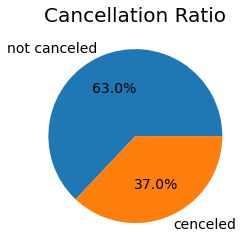

In [7]:
plt.pie(df['is_canceled'].value_counts(),labels=['not canceled','cenceled'], autopct='%1.1f%%',textprops={'fontsize':14})
plt.title("Cancellation Ratio", fontsize=20)
plt.show()

## 호텔 취소와 관련있는 feature는 무엇이 있을까?

### 1. Hotel


먼저 본 data에 포함된 호텔은 몇 곳이 있으며, 그 구성은 어떤지 살펴보겠습니다.

In [8]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

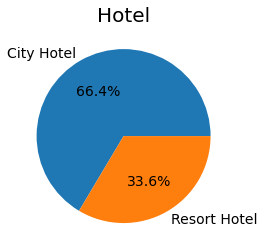

In [9]:
plt.pie(df['hotel'].value_counts(),labels=['City Hotel','Resort Hotel'], autopct='%1.1f%%',textprops={'fontsize':14})
plt.title("Hotel", fontsize=20)
plt.show()

공교롭게도 호텔 비율과 캔슬 비율이 거의 비슷하네요. 설마 한 호텔에서 모드 취소가 나온 것은 아니겠지요?
살펴봅시다.

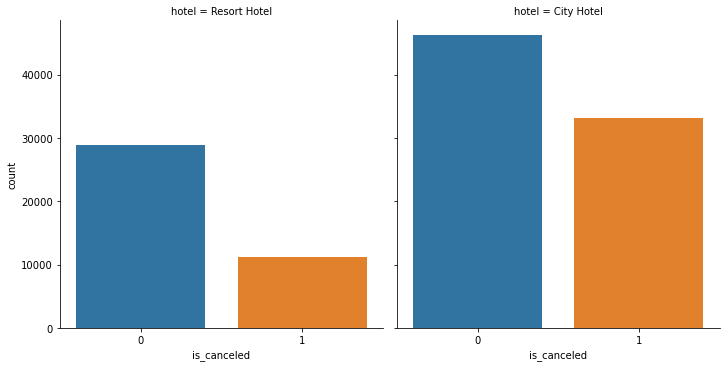

In [10]:
sns.catplot(x='is_canceled', col = 'hotel' , kind = 'count', data=df)
plt.show()

다행히 그런 것 같지는 않네요. 리조트호텔과 시티호텔 모두 취소한 케이스와 그렇지 않은 케이스가 있었습니다.
그런데 호텔별로 취소율 차이가 있는 것 같지 않나요?

In [11]:
df[['hotel','is_canceled']].groupby(['hotel']).mean()

,is_canceled
hotel,
City Hotel,0.417270
Resort Hotel,0.277634


시티호텔의 취소율이 훨씬 높습니다. 40%나 되고 리조트 호텔은 28% 정도 되네요.  
왜 그럴까요? 각 호텔이 가지고 있는 어떤 feature 때문이겠죠? 그것이 무엇일지 궁금해지네요.

### 2. time of year

feature들 중에 'arrival_date_month'가 있습니다. 호텔 숙박을 월을 의미합니다.

In [12]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

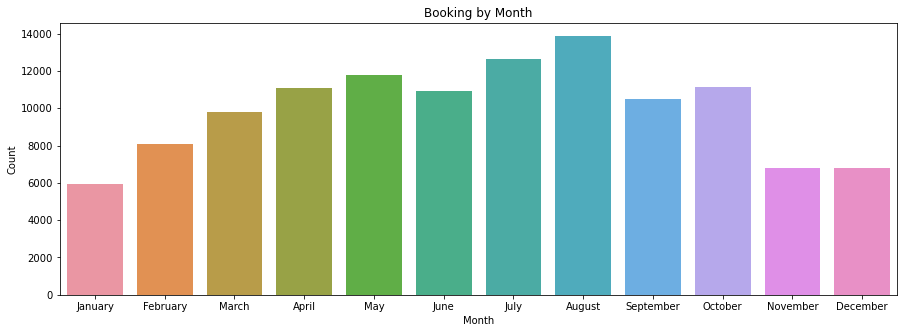

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data = df,x= "arrival_date_month",
              order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Booking by Month')
plt.show()

예약 건수가 적어지는 11, 12, 1월 겨울철이 비수기인 것 같네요.  
혹시 month와 is_canceled 사이에 관계가 있을까요?

In [14]:
look_up = {'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05',
            'June': '06', 'July': '07', 'August': '08', 'September': '09', 'October': '10', 'November': '11', 'December': '12'}
#see_hotel={'Resort Hotel':0,'City Hotel':1}

df['arrival_date_month(int)'] = df['arrival_date_month'].apply(lambda x: look_up[x])

In [15]:
c_ratio_by_month = df[['arrival_date_month(int)','is_canceled']].groupby(['arrival_date_month(int)']).mean()
c_ratio_by_month

,is_canceled
arrival_date_month(int),
01,0.304773
02,0.334160
03,0.321523
04,0.407972
05,0.396658
06,0.414572
07,0.374536
08,0.377531
09,0.391702


In [16]:
city_hotel = df[df['hotel']=='City Hotel']
crbm_city=city_hotel[['arrival_date_month(int)','is_canceled']].groupby(['arrival_date_month(int)']).mean()

In [17]:
resort_hotel = df[df['hotel']=='Resort Hotel']
crbm_resort=resort_hotel[['arrival_date_month(int)','is_canceled']].groupby(['arrival_date_month(int)']).mean()

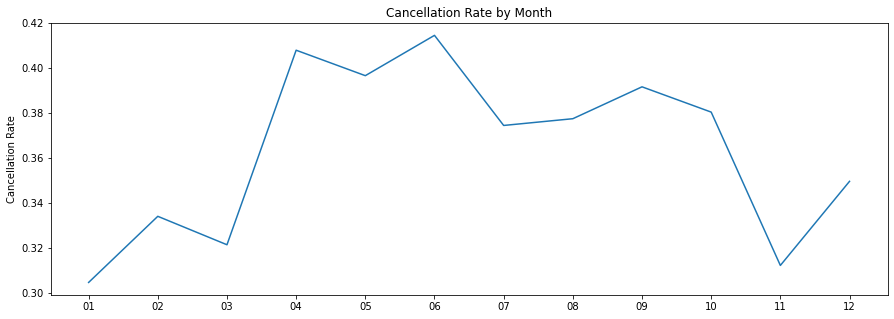

In [18]:
plt.figure(figsize=(15,5))
plt.plot(c_ratio_by_month)

plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Month')

plt.show()

전체적으로 비수기의 취소율이 낮고, 성수기의 취소율이 더 높은 것 같습니다.  
호텔에 따라 이 수치가 다를 수도 있을까요?
일단, 각 호텔의 월별 예약건수를 보겠습니다.

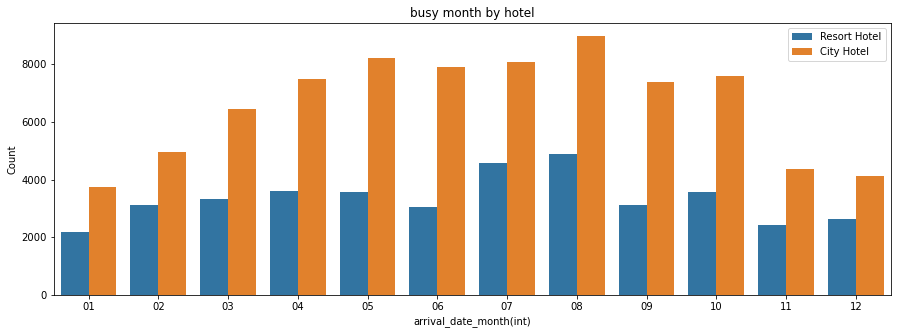

In [19]:
plt.figure(figsize=(15,5))

sns.countplot(data = df,x= 'arrival_date_month(int)',hue="hotel"
              , order = ['01','02','03','04','05','06','07','08','09','10','11','12'])
plt.ylabel('Count')
plt.title('busy month by hotel')
plt.legend(["Resort Hotel", "City Hotel"])

plt.show()

시티호텔의 경우 여름과 겨울의 격차가 더 커보이는 군요.
예약 취소율은 어떨까요?

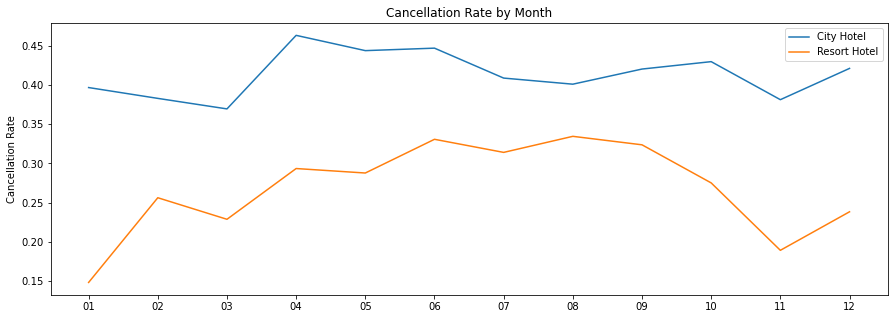

In [20]:
plt.figure(figsize=(15,5))
plt.plot(crbm_city)
plt.plot(crbm_resort)

plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Month')
plt.legend(['City Hotel','Resort Hotel'])
plt.show()

전체적으로 시티 호텔의 취소율이 높고 리조트 호텔의 취소율이 낮지만, 특히 취소율이 낮은편이었던 비수기에서 그 차이가 커지는 군요.  
시티 호텔은 비수기에도 40% 정도의 취소율이 계속 나온 반면,  
리조트 호텔은 비수기에는 취소율이 15~20% 정도까지 떨어지고, 성수기에는 30% 정도의 취소율을 보이네요.

## 3. 리드타임

'lead_time'이란 변수는 무슨 뜻을 가진 변수일까요?  
여행업계에서 사용하는 용어 '리드타임'은 예약일과 출발, 또는 도착일 사이의 시간을 의미합니다.  
즉, 내가 4월 30일에 3박 4일 숙박할 호텔을 4월 1일 예약했다면 리드타임은 29일이지요.
그렇다면 먼저 리드타임의 분포부터 봅시다.

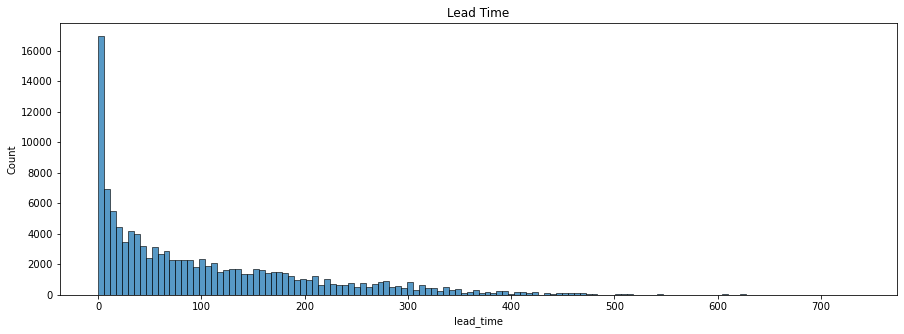

In [21]:
plt.figure(figsize=(15,5))

sns.histplot(x=df['lead_time'])
plt.title('Lead Time')

plt.show()

대체적으로 리드타임은 50일 이내에 몰려있고, 뒤로 갈 수록 긴 꼬리 형태로 나타납니다.  
1년 이상의 긴 리드타임을 보인 케이스도 있습니다.  
리드 타임과 취소율이 관련이 있을까요?
가설을 세워보자면, 아무래도 미리 예약을 한 경우에는 긴 리드 타임 사이에 어떤 사건이 발생해서 취소할 가능성이 높을 것 같습니다.

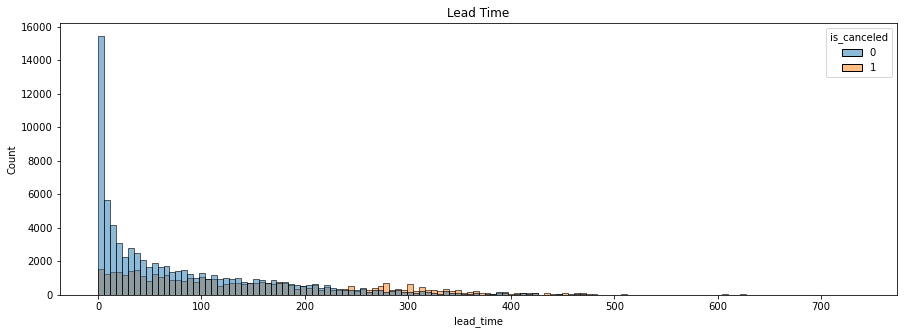

In [22]:
plt.figure(figsize=(15,5))

sns.histplot(x=df['lead_time'], hue=df['is_canceled'])
plt.title('Lead Time')

plt.show()

역시 리드타임이 짧은 경우에는 취소하지 않은 경우가 월등히 높은 반면에 뒤로 갈 수록 취소가 더 많은 경우도 눈에 띄네요.  
취소율을 주리려면 짧은 리드타임을 줄이기 위한 영업 전략을 세워볼 수 있겠네요.  
예를 들어 홈페이지의 예약 오픈 기간을 너무 길게 잡지 않는다든지 하는 것이요. (1년 이내, 혹은 6개월 이내 예약만 가능하도록)  
혹시 이것도 호텔 간 차이가 있을까요?

In [33]:
crblt_city=city_hotel[['lead_time','is_canceled']].groupby(['lead_time']).mean()
crblt_resort=resort_hotel[['lead_time','is_canceled']].groupby(['lead_time']).mean()

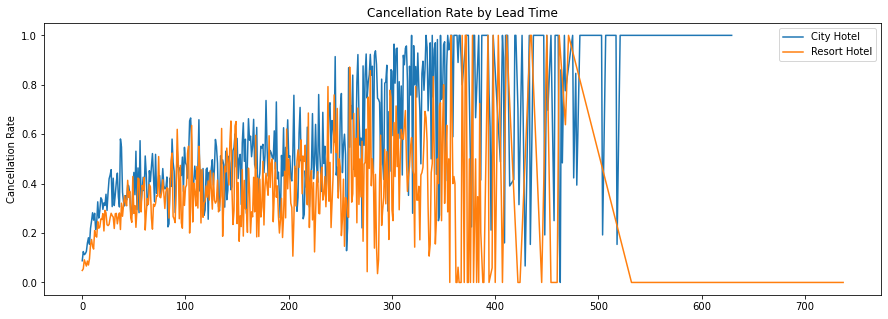

In [34]:
plt.figure(figsize=(15,5))
plt.plot(crblt_city)
plt.plot(crblt_resort)

plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Lead Time')
plt.legend(['City Hotel','Resort Hotel'])
plt.show()

조금 어수선하긴 하지만, 전체적인 패턴은 두 호텔 사이의 차이가 적어 보이고, 다만 전체적인 취소율은 리조트 호텔이 더 낮은 전체적인 비율과 크게 차이가 없어 보이네요.
